![Link Name](https://ichef.bbci.co.uk/news/976/cpsprodpb/B38D/production/_109556954_airbnb.png)

# Overview
Airbnb (ABNB) is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in specific locales. The company has come a long way since 2007, when its co-founders first came up with the idea to invite paying guests to sleep on an air mattress in their living room. According to Airbnb's latest data, it now has more than 7 million listings, covering some 100,000 cities and towns in 220-plus countries and regions.

**Bangkok**, city, capital, and chief port of Thailand. It is the only cosmopolitan city in a country of small towns and villages and is Thailand’s cultural and commercial centre.


**Bangkok**, the lively and famous city in Thailand, is one of the most sought-after places in the world. Many people from abroad come here, making Bangkok a favorite destination. In 2019, the city welcomed around 67 million visitors! That's why Bangkok is very popular on platforms like Airbnb, where people can find unique and diverse places to stay.

# Business Problems

Business Problem Introduction:

In the bustling city of Bangkok, where tourism is thriving and cultural experiences abound, the availability and pricing of accommodations play a pivotal role in shaping the travel experiences of visitors, especially for Indonesian tourists enjoying the convenience of a 30-day free visa. This analysis aims to address key business questions tailored for Indonesian travelers seeking accommodation on Airbnb in Bangkok.

Key Business Questions:

1. **How many active listings are there in Bangkok?**
<br>  For Indonesian tourists planning a trip to Bangkok, knowing the total number of active Airbnb listings provides valuable insights into the breadth of accommodation options available in the city.

2. **How many listings are there in specific areas of Bangkok, and what about the prices?**
<br> Indonesian travelers may have preferences for specific areas in Bangkok. Analyzing listings in these areas, coupled with pricing information, enables tourists to make informed decisions based on their desired locations and budget considerations.

3. **Do hosts predominantly rent out their entire home or just a room?**
<br> Understanding whether hosts in Bangkok typically offer entire homes or individual rooms helps Indonesian travelers tailor their accommodation choices based on personal preferences and the nature of their travel companions.

By addressing these business questions, this analysis serves as a valuable resource for Indonesian tourists exploring Airbnb options in Bangkok. The insights derived from the data aim to empower travelers to make well-informed choices that align with their preferences, budget, and the unique experiences during their 30-day visa-free vacation in this vibrant and dynamic city.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

## Data
The data being used consists of various listings of AirBnB in Bangkok, Thailand. This dataset includes information such as listing name, host details, neighborhood of listing, room type, pricing, reviews, and more. 

#### Airbnb Listings Bangkok Data Dictionary

| **Feature**                    | **Description**                                                   |
|--------------------------------|-------------------------------------------------------------------|
| id                             | Airbnb's unique identifier for the listing.                       |
| name                           | Name of the listing.                                              |
| host_id                        | Airbnb's unique identifier for the host/user.                     |
| host_name                      | Name of the host. Usually, just the first name(s).                |
| neighborhood                   | The neighborhood is geocoded using the latitude and               |
|                                | longitude against neighborhoods as defined by open or public      |
|                                | digital shapefiles.                                               |
| latitude                       | Uses the World Geodetic System (WGS84) projection for             |
|                                | latitude and longitude.                                           |
| longitude                      | Uses the World Geodetic System (WGS84) projection for             |
|                                | latitude and longitude.                                           |
| room_type                      | [Entire home/apt \|Private room\| Shared room\| Hotel]            |
|                                | All homes are grouped into the following three room types:        |
|                                | Entire place                                                      |
|                                | Entire places are best if you're seeking a home away from         |
|                                | home. With an entire place, you'll have the whole space to        |
|                                | yourself. This usually includes a bedroom, a bathroom, a          |
|                                | kitchen, and a separate, dedicated entrance. Hosts should         |
|                                | note in the description if they'll be on the property or not (ex: |
|                                | "Host occupies the first floor of the home") and provide further  |
|                                | details on the listing.                                           |
|                                | Private rooms                                                     |
|                                | Private rooms are great for when you prefer a little privacy,     |
|                                | and still value a local connection. When you book a private       |
|                                | room, you'll have your private room for sleeping and may          |
|                                | share some spaces with others. You might need to walk             |
|                                | through indoor spaces that another host or guest may occupy       |
|                                | to get to your room.                                              |
|                                | Shared rooms                                                      |
|                                | Shared rooms are for when you don't mind sharing a space          |
|                                | with others. When you book a shared room, you'll be sleeping      |
|                                | in a space that is shared with others and share the entire        |
|                                | space with other people. Shared rooms are popular among           |
|                                | flexible travelers looking for new friends and budget-friendly    |
|                                | stays.                                                            |
| price                          | Daily price in local currency. Note, the $ sign may be used       |
|                                | despite the locale.                                               |
| minimum_nights                 | The minimum number of night stays for the listing (calendar       |
|                                | rules may differ).                                                |
| number_of_reviews              | The number of reviews the listing has.                            |
| last_review                    | The date of the last/newest review.                               |
| calculated_host_listings_count | The number of listings the host has in the current scrape in      |
|                                | the city/region geography.                                        |
| availability_365               | avaliability_x. The calendar determines the availability of the   |
|                                | listing x days in the future. Note a listing may be available     |
|                                | because it has been booked by a guest or blocked by the           |
|                                | host.                                                             |
| number_of_reviews_ltm          | The number of reviews the listing has (in the last 12 months).    |

## Initial Dataset

In [46]:
df = pd.read_csv('Airbnb Listings Bangkok.csv',
                 parse_dates=['last_review'])
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaT,NaN,14,365,0


# Data Understanding and Cleaning

Data Understanding and Cleaning are pivotal phases in the data analysis process. By understanding the data, we uncover patterns and anomalies, setting the stage for informed cleaning strategies. Cleaning the data follows, addressing inconsistencies, missing values, and outliers to ensure its reliability for analysis.

The data consists of 15,854 entries and 17 columns.




In [47]:
# checking the number of observations in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

the dataset separated into two categories: numeric and object columns. This division facilitates a focused examination of key statistical measures for each type of column.
Only a subset of columns is displayed as statistical information is required for specific columns.

In [48]:
#Numeric columns to be selected
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

#Object columns to be selected
object_columns = ['name', 'host_name', 'neighbourhood', 'room_type']

#Display descriptive statistics for numeric columns
numeric_describe = df[numeric_columns].describe()

#Display descriptive statistics for object columns
object_describe = df[object_columns].describe(include='object')

display(numeric_describe, object_describe)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


In the effort to provide a more detailed exploration, the display options have been adjusted to show the complete content of each column. The selected columns for unique information include `name`, `host_name`, `neighbourhood`, `price`, `minimum_nights`, `room_type`, and `number_of_reviews_ltm`.

In [49]:
# Set option to display the entire content of columns
pd.set_option('display.max_colwidth', None)

# Columns for which unique information is to be displayed
selected_columns = ['name','host_name', 'neighbourhood', 'price', 'minimum_nights', 'room_type', 'number_of_reviews_ltm']

#Object columns to be selected
list_item = []
for col in selected_columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])

# Create a DataFrame for description
table_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data=list_item)

display(table_desc)

,Column Name,Number of Unique,Unique Sample
0,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 bed 2 bath, BTS, Supermarkets, Monthly, Private, relaxed with amenities, S1 hostel (Dorm) Sathorn Bangkok, 3 minutes walk to Phrom Phong BTS, 1 BDM CONDO SAPHAN KWAI/ARI walk to JJ/BTS/MRT, เฮ้าส์โหมด House Mode, ❂100% Private&Central Light EnSuite, Spacious Studio kitchen/wifi, 2. Bangkok bright Apartment 201, 1.Bangkok great value Studio WIFI, BKK City Fab Luxx Studio free wifi @1194, 5. Bangkok Bright Apartment -WIFI, 6. Bangkok nice, cosy Apartment 201, 7. Bangkok big bright Apartment 402, STUDIO-WIFI-RAIN SHOWER-SATHORN, Luxury Riverview Teakwood Apartment-Great Views :), 1 Bed Pool Access Onnut BTS, ...]"
1,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk, Piyakorn, Sue, Henry, Timo, Pat, Muay, Chuchart, Shine, Dustin, Sudhichai, Anya, Parinya, วสวัตติ์

While the `Unnamed: 0` column could serve as a potential unique identifier in cases where none are provided, it becomes redundant in our dataset. We already have dedicated unique identifiers for each listing and host, represented by the `id` and `host_id` columns. In addition to removing the `Unnamed: 0` column, the decision has been made to drop the `id` and `host_id` columns. These columns, serving as unique identifiers for each listing and host, are not essential for the specific analytical objectives. 

In [50]:
df.drop(columns=['Unnamed: 0', 'id', 'host_id'], inplace= True)

After removing the unnecessary columns, there are 7 duplicate records in the dataset.

In [51]:
duplicated_counts = df.duplicated().value_counts()
duplicated_counts

False    15847
True         7
Name: count, dtype: int64

In [52]:
duplicates = df[df.duplicated()]
duplicates

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5976,NA BANGLAMPOO GUEST HOUSE,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,NaN,9,361,0
8790,small1,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,NaN,4,180,0
15186,Sathon Luxury 2 br/China Town/Icon Siam,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,44,340,0
15191,Sathon Luxury 2 br/China Town/Icon Siam,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0
15550,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,NaT,NaN,33,360,0
15615,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,Alice,Huai Khwang,13.757097,100.568486,Entire home/apt,2533,3,0,NaT,NaN,40,360,0
15831,Family Room for 4 People,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,NaT,NaN,14,360,0


The next step involves addressing these duplicate entries and removing duplicate entries from the dataset. The result indicates that there are no remaining duplicates in the dataset. This ensures that the dataset is now free from redundant records, contributing to data consistency and integrity for subsequent analysis.

In [53]:
df_no_duplicates = df.drop_duplicates()
duplicates_after_removal = df_no_duplicates.duplicated().value_counts()
duplicates_after_removal

False    15847
Name: count, dtype: int64

In the dataset, several columns contain missing values (NaN). Specifically, the `name` column has 8 missing entries, the `host_name` column has 1 missing entry, the `last_review` column has 5,790 missing entries, and the `reviews_per_month` column also has 5,790 missing entries. Addressing these missing values may be necessary to ensure the accuracy and completeness of the data before proceeding with further analysis.

In [54]:
df.isna().sum()

name                                 8
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

To handle these missing values, we will be deleting the empty values, for several reasons:

1. The number of listings with empty name and host name is very insignificant as compared to the data (9 vs a total of 15000+ data).
2. The analysis section may need analysis on listing name and host name, and null values in the dataset may impact the insights obtained from the analysis.
3. Empty values in name and host name are likely to be errors in the program or false obtained information. Removing these ensures that the data we work with are reliable and valid.

In [55]:
df[(df['name'].isna()) | (df['host_name'].isna())]

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,NaN,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,NaN,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,NaN,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,NaN,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,NaN,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,NaN,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,NaN,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,NaN,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0
3571,Cozy Hideaway,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [56]:
df.dropna(subset=['name', 'host_name'], inplace=True)


After handling missing values, the dataset now reflects changes. The `name` and `host_name` columns no longer have any missing entries. However, the `last_review` and `reviews_per_month` columns still contain 5,784 missing values each.

In [57]:
df.isna().sum()

name                                 0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

We can also see that there are two other columns that contain empty values: the `last review` and `reviews_per_month` columns. After further checking, there are over 5000+ data where these columns are null. Since the data is significant, we will not be deleting the data.

This information highlights have a pattern: when `number_of_reviews` is 0, `last_review` and `reviews_per_month` are consistently NaN.

After checked, it is observed that there are no rows where `number_of_reviews` is greater than 0 and `last_review` is NaN.

In [58]:
random_last_review = df[['number_of_reviews', 'last_review', 'reviews_per_month']].sample(n=10, random_state=42)
random_last_review

,number_of_reviews,last_review,reviews_per_month
7154,0,NaT,NaN
169,53,2022-12-06,0.46
2107,1,2017-10-15,0.02
3957,3,2018-04-08,0.05
5782,0,NaT,NaN
8508,54,2022-12-16,1.33
11169,15,2022-11-29,0.56
8049,0,NaT,NaN
88,0,NaT,NaN
13972,0,NaT,NaN


In [59]:
# Select rows where 'number_of_reviews' is not equal to 0
non_zero_reviews = df[df['number_of_reviews'] != 0]

# Select rows where 'number_of_reviews' is not equal to 0 and 'last_review' is NaN
nan_last_review = non_zero_reviews[non_zero_reviews['last_review'].isna()]
nan_last_review[['number_of_reviews', 'last_review', 'reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month


Further analysis shows that columns where `reviews_per_month` is null indicate that the listings contain no reviews at all (`number_of_reviews` is equal to 0). Therefore, we will be replacing these null values with the number ‘0’.

However, we will not be handling the null values in the column `last_review`. There are several reasons for doing this:

1. Attempting to replace the empty values in the column with a value, such as “Unknown”, may cause inefficiencies during the data analysis section, because it converts the entire datatype of the column into an object, which requires repeated conversions of the column’s datatype from object back to datetime.
2. As stated above, deletion of the data is unreasonable.
3. Listings with empty `last_review` column have exactly zero reviews, which can be used for insight in the data analysis section.

In [60]:
df['reviews_per_month'].fillna('0.0', inplace = True)
df[df['reviews_per_month'] == '0.0'][['number_of_reviews', 'last_review', 'reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
1,0,NaT,0.0
2,0,NaT,0.0
4,0,NaT,0.0
7,0,NaT,0.0
14,0,NaT,0.0
...,...,...,...
15849,0,NaT,0.0
15850,0,NaT,0.0
15851,0,NaT,0.0
15852,0,NaT,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15845 non-null  object        
 1   host_name                       15845 non-null  object        
 2   neighbourhood                   15845 non-null  object        
 3   latitude                        15845 non-null  float64       
 4   longitude                       15845 non-null  float64       
 5   room_type                       15845 non-null  object        
 6   price                           15845 non-null  int64         
 7   minimum_nights                  15845 non-null  int64         
 8   number_of_reviews               15845 non-null  int64         
 9   last_review                     10061 non-null  datetime64[ns]
 10  reviews_per_month               15845 non-null  object        
 11  calcula

Airbnb listings require several compulsory information, including the price of listing. Therefore, any listing where the price is equal to 0 will be treated as errors in the data, and will be removed.

In [62]:
zero_price_rows = df[df['price'] == 0]
zero_price_rows

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,Somerset Maison Asoke Bangkok,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,0.0,1,0,0


In [63]:
df.drop(11103, inplace=True)


The data is removed because the percentage of entries with `minimum_nights` > 30 is relatively small, specifically less than 10% of the entire dataset. The decision to exclude such data is made to prioritize the majority of listings that are more relevant to the target audience—Indonesian tourists with a 30-day free visa.

In [64]:
print(f'Percentage with minimum nights > 30: {(len(df[df["minimum_nights"] > 30]) / len(df)) * 100:.2f}%')
print(f'Number with minimum nights > 30: {len(df[df['minimum_nights'] > 30])}')

Percentage with minimum nights > 30: 5.48%
Number with minimum nights > 30: 868


In [65]:
df.drop(df[df['minimum_nights'] > 30].index, inplace=True)

The dataset has been modified, and now it contains 14 columns with 14,976 entries. Notably, the `last_review` column has 9,625 non-null entries, indicating the presence of date values in the date format. The changes in the dataset aim to focus on relevant information for analysis while maintaining data integrity.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14976 entries, 0 to 15853
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            14976 non-null  object        
 1   host_name                       14976 non-null  object        
 2   neighbourhood                   14976 non-null  object        
 3   latitude                        14976 non-null  float64       
 4   longitude                       14976 non-null  float64       
 5   room_type                       14976 non-null  object        
 6   price                           14976 non-null  int64         
 7   minimum_nights                  14976 non-null  int64         
 8   number_of_reviews               14976 non-null  int64         
 9   last_review                     9625 non-null   datetime64[ns]
 10  reviews_per_month               14976 non-null  object        
 11  calcula

A new column named `night_range` has been created in the dataset. This column categorizes the existing data in the `minimum_nights` column into different ranges: Week 1 (0-7 nights), Week 2 (8-14 nights), Week 3 (15-21 nights), and Week 4 (22-30 nights). This categorization is useful for analyzing and understanding the distribution of minimum nights required for booking. The new column provides a more structured and informative representation of the `minimum_nights` data, facilitating insights into booking patterns and preferences based on different time frames.

In [67]:
night_range = [0, 7, 14, 21, 30]

# Membuat kolom baru "night_range" berdasarkan kategori
df['night_range'] = pd.cut(df['minimum_nights'], bins=night_range, labels=['Week 1', 'Week 2', 'Week 3', 'Week 4'])



In [68]:
df.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,night_range
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,Week 1
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.0,2,358,0,Week 1
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Week 1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.0,3,365,0,Week 1
6,Condo with Chaopraya River View,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,Week 1


In [69]:
df.reset_index(drop=True, inplace=True)

The dataset has been cleaned and is now ready for analysis. We will be saving this new dataset in a `.csv` file.

In [70]:
display(df.head(),df.tail())

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,night_range
0,Nice room with superb city view,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,Week 1
1,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.0,2,358,0,Week 1
2,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Week 1
3,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.0,3,365,0,Week 1
4,Condo with Chaopraya River View,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,Week 1


,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,night_range
14971,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.0,1,362,0,Week 4
14972,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.0,14,365,0,Week 1
14973,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.0,14,365,0,Week 1
14974,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.0,14,365,0,Week 1
14975,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaT,0.0,14,365,0,Week 1


In [71]:
df.to_csv('Airbnb Listings Bangkok_clean.csv',index=False)

In [72]:
df.to_excel('Airbnb Listings Bangkok_clean.xlsx', index=False)

# Data Analysis

### Business Problems

Key Business Questions:

1. **How many active listings are there in Bangkok?**
<br>  For Indonesian tourists planning a trip to Bangkok, knowing the total number of active Airbnb listings provides valuable insights into the breadth of accommodation options available in the city.

2. **How many listings are there in specific areas of Bangkok, and what about the prices?**
<br> Indonesian travelers may have preferences for specific areas in Bangkok. Analyzing listings in these areas, coupled with pricing information, enables tourists to make informed decisions based on their desired locations and budget considerations.

3. **Do hosts predominantly rent out their entire home or just a room?**
<br> Understanding whether hosts in Bangkok typically offer entire homes or individual rooms helps Indonesian travelers tailor their accommodation choices based on personal preferences and the nature of their travel companions.

There are a total of 242 inactive Airbnb listings in Bangkok, characterized by both zero availability throughout the year and zero reviews.
<br> Top Inactive Hosts is Zuzu, leads with 12 inactive listings.
<br> The presence of a significant number of inactive listings may indicate properties that are not frequently booked or utilized by guests.
<br>Hosts with multiple inactive listings may need to reevaluate their property management strategies to enhance listing visibility and attract potential guests.
The insights provide valuable information for Airbnb users and potential guests, helping them understand which hosts and properties may require further consideration or investigation before making a booking decision.

<br>
For Active Listings, there are a total of 9,040 active Airbnb listings in Bangkok, indicating properties with availability throughout the year and positive guest reviews.
<br>Top Active Hosts is Curry, dominates with 159 active listings.
<br>Hosts with a high number of active listings may indicate successful property management and positive guest experiences.
<br>The insights help potential guests identify hosts with a track record of active engagement, availability, and a substantial number of reviews.
<br>Hosts with numerous active listings may be perceived as reliable and experienced, potentially attracting more bookings from guests seeking trustworthy accommodations.

In [73]:
# Filter the DataFrame for inactive listings
inactive_listings = df[(df['availability_365'] == 0) & (df['number_of_reviews'] == 0)]

# Display the total number of inactive listings
total_inactive_listings = inactive_listings.shape[0]
print(f'Total Number of Inactive Listings: {total_inactive_listings}')


Total Number of Inactive Listings: 242


In [88]:
# Count the number of inactive listings for each host_name
inactive_listing_counts = inactive_listings['host_name'].value_counts()

# Create a new DataFrame from the inactive_listing_counts Series
inactive_hosts_df = pd.DataFrame({'host_name': inactive_listing_counts.index, 'inactive_listing': inactive_listing_counts.values})

# Retrieve the top 10 host_names based on the number of inactive listings
top_10_inactive_hosts = inactive_hosts_df.head(10)
top_10_inactive_hosts

,host_name,inactive_listing
0,Zuzu,12
1,Riverview,9
2,Gilles,7
3,Rachan,6
4,Panitchaya,6
5,Nakun,6
6,Warisara,5
7,Narra,4
8,ChingCha,4
9,Dilok,4


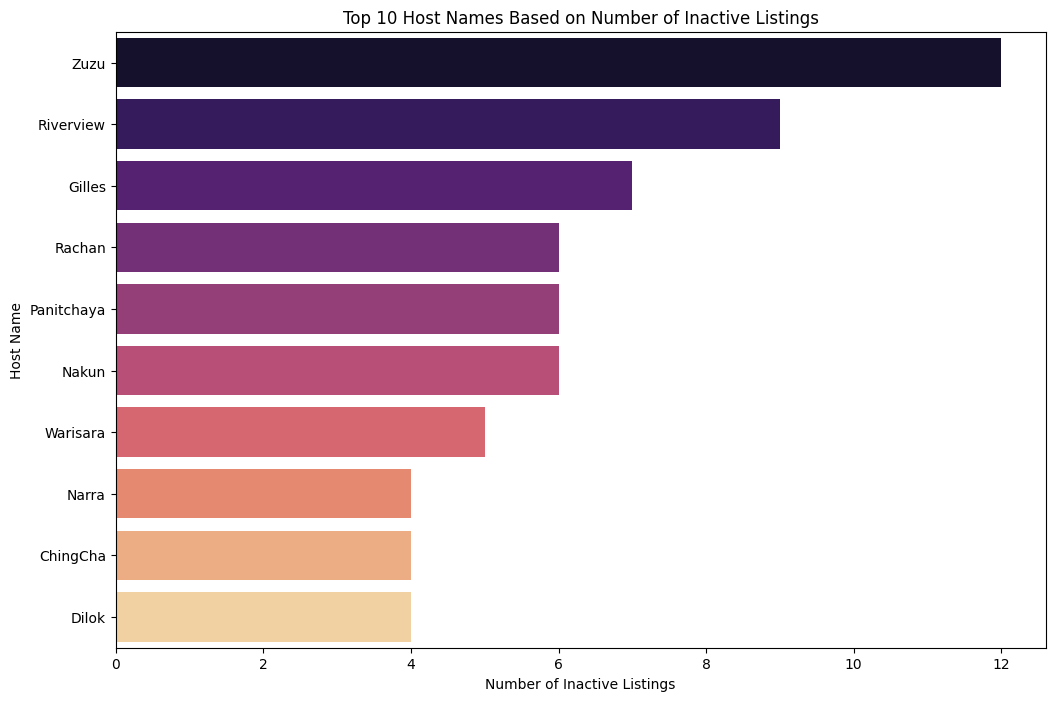

In [76]:
# Visualization with a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='inactive_listing', y='host_name', data=top_10_inactive_hosts, palette='magma')
plt.xlabel('Number of Inactive Listings')
plt.ylabel('Host Name')
plt.title('Top 10 Host Names Based on Number of Inactive Listings')
plt.show()

In [77]:
# Filter the DataFrame for active listings
active_listings = df[(df['availability_365'] != 0) & (df['number_of_reviews'] != 0)]

# Display the total number of active listings
total_active_listings = active_listings.shape[0]
print(f'Total Number of Active Listings: {total_active_listings}')

Total Number of Active Listings: 9040


In [78]:
# Filter the DataFrame for active listings
active_listings = df[(df['availability_365'] != 0) & (df['number_of_reviews'] != 0)]

# Count the number of active listings for each host_name
active_listing_counts = active_listings['host_name'].value_counts()

# Create a new DataFrame from the active_listing_counts Series
active_hosts_df = pd.DataFrame({'host_name': active_listing_counts.index, 'active_listing': active_listing_counts.values})

# Retrieve the top 10 host_names based on the number of active listings
top_10_active_hosts = active_hosts_df.head(10)
top_10_active_hosts

,host_name,active_listing
0,Curry,159
1,Noons,72
2,K,72
3,Ed,53
4,Ludoping,52
5,Mike,52
6,Bee,49
7,Patty,45
8,Summer,45
9,Tony,44


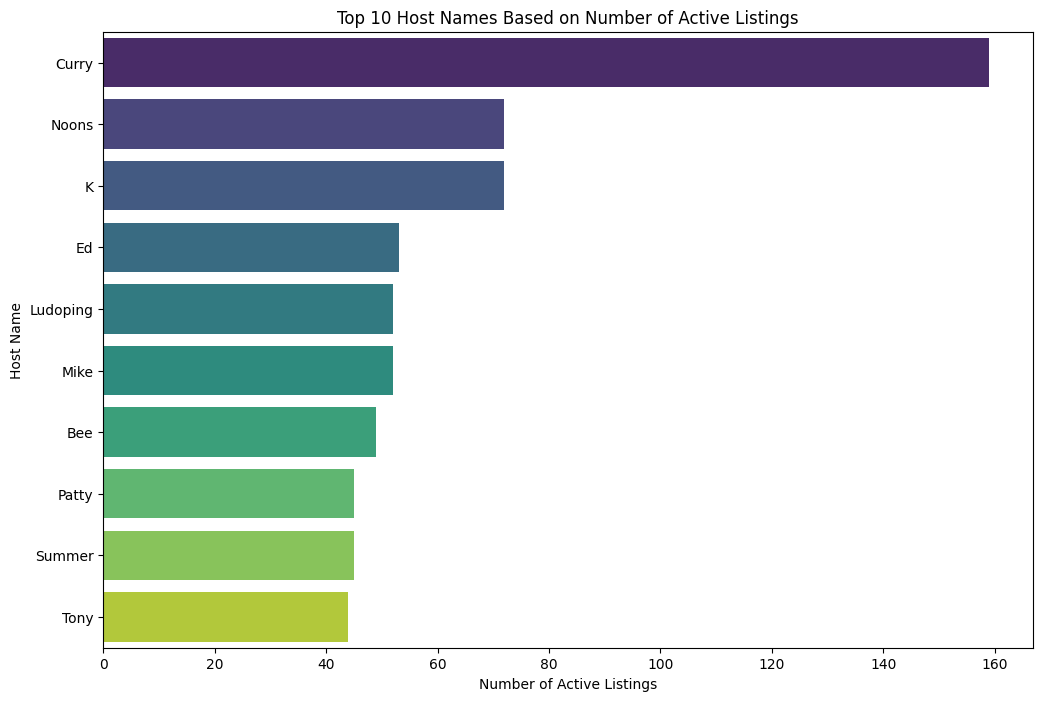

In [79]:
# Visualization with a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='active_listing', y='host_name', data=top_10_active_hosts, palette='viridis')
plt.xlabel('Number of Active Listings')
plt.ylabel('Host Name')
plt.title('Top 10 Host Names Based on Number of Active Listings')
plt.show()

Here are some insights:

1. **Vibrant Areas**: Vadhana and Khlong Toei are the top two neighborhoods with the highest number of Airbnb listings, indicating they are popular and likely vibrant areas.

2. **Diverse Options**: The distribution of listings across different neighborhoods suggests diverse options for travelers. Some areas might be preferred for their cultural attractions, while others for their business or shopping districts.

3. **City Center Dominance**: Neighborhoods like Ratchathewi, Bang Rak, and Sathon, which are closer to the city center, also have a significant number of listings, likely due to their central location and accessibility.

4. **Varied Preferences**: Travelers can find accommodations across a spectrum of neighborhoods, catering to different preferences and interests. Some might prefer the bustling city life, while others may seek a more relaxed atmosphere.

Overall, this information can assist tourists in choosing neighborhoods that align with their preferences and interests during their stay in Bangkok.

In [85]:
# Number of AirBnb in different neighbourhood
neighbourhood_count = df.groupby("neighbourhood").size().reset_index(name='count')
neighbourhood_count = neighbourhood_count.sort_values(by='count', ascending=False).reset_index(drop=True)
neighbourhood_count

,neighbourhood,count
0,Vadhana,2054
1,Khlong Toei,1979
2,Huai Khwang,1063
3,Ratchathewi,1058
4,Bang Rak,791
5,Sathon,776
6,Phra Nakhon,619
7,Phra Khanong,515
8,Chatu Chak,507
9,Parthum Wan,426


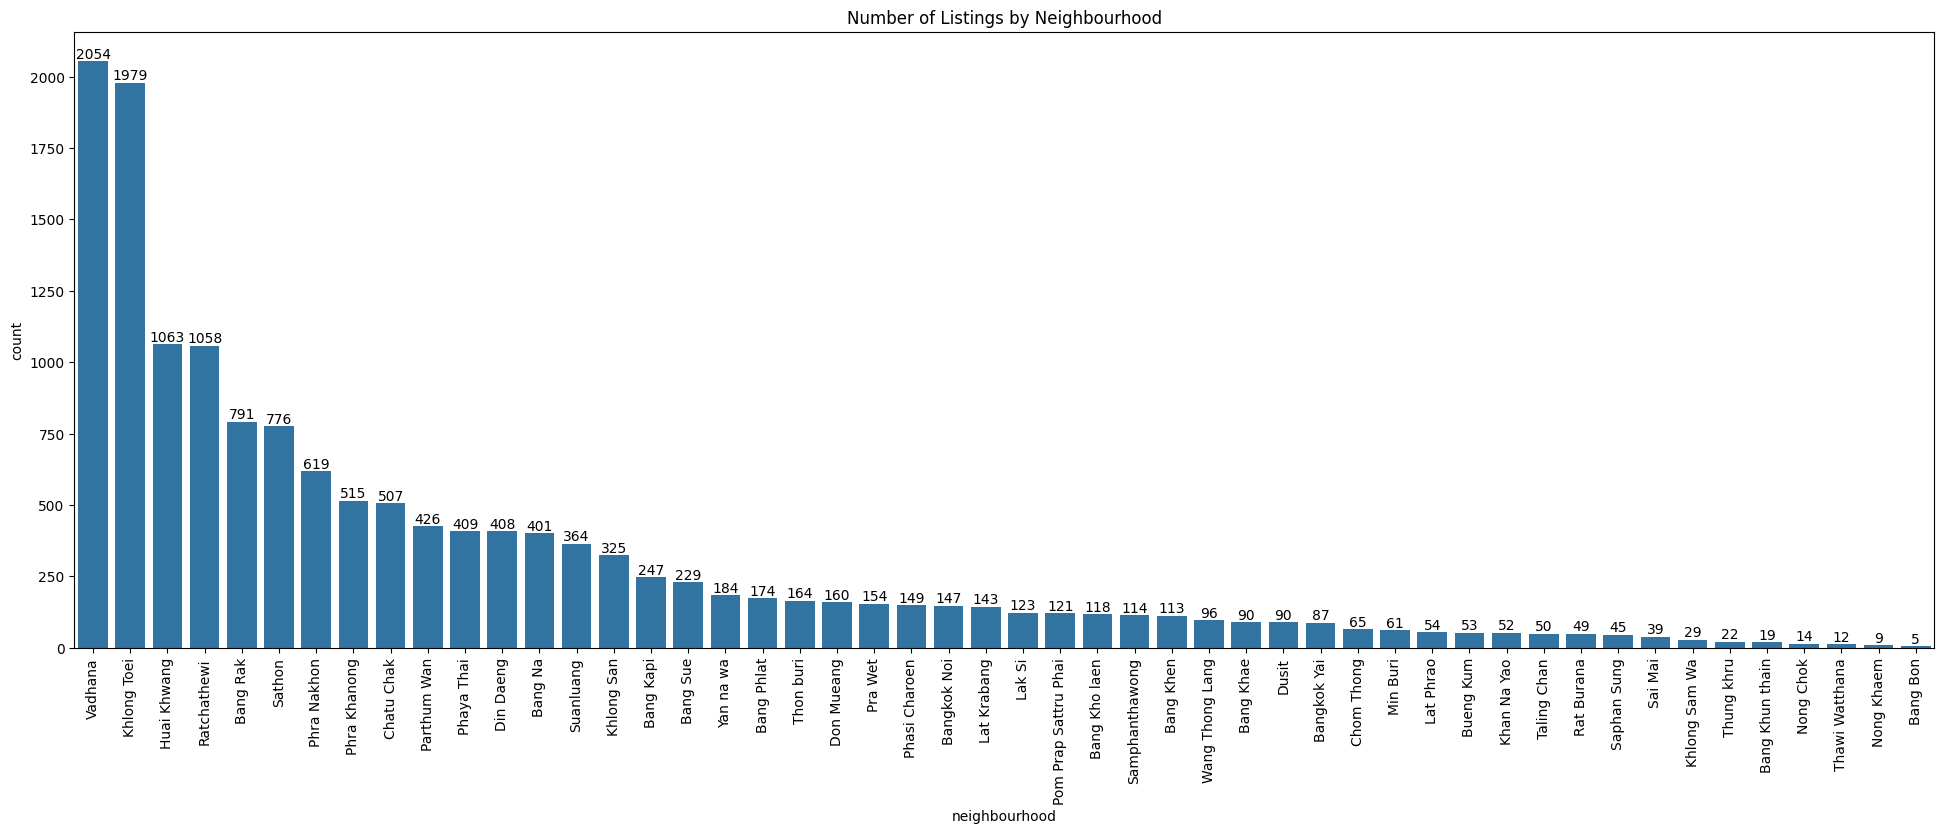

In [81]:
# using countplot to visualize the number of Airbnbs in each neighbourhood
plt.figure(figsize = (24,8))
ax = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)
abs_values = df['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Number of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [132]:
average_price = df['price'].mean()
average_price

3081.3486912393164

Here are some insights:

1. **Luxury in Bang Phlat**: Bang Phlat has the highest average price, suggesting it might be associated with luxury accommodations or unique offerings that command higher prices.

2. **Diversity in Prices**: There's a significant range in average prices across neighborhoods, reflecting the diversity of offerings. Some neighborhoods may have a mix of budget and high-end accommodations.

3. **Popular Areas**: Vadhana, Khlong Toei, and Pathum Wan are known for their popularity among tourists and locals, and they also have relatively higher average prices.

4. **Affordable Options**: On the other hand, neighborhoods like Lak Si, Nong Khaem, and Don Mueang have comparatively lower average prices, making them potentially attractive for budget-conscious travelers.

5. **Variation in Price Sensitivity**: The average price can be indicative of the perceived value of accommodations in each neighborhood. Travelers willing to pay a premium may find it in areas with higher average prices.

This information can assist travelers in selecting neighborhoods that align with their budget and preferences when searching for accommodations in Bangkok.

In [84]:
# Calculate the average price for each neighbourhood
average_prices_neighbourhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Create a new DataFrame with columns 'neighbourhood' and 'avg_price'
sorted_neighbourhood_info = average_prices_neighbourhood[['neighbourhood', 'price']].sort_values(by='price', ascending=False).reset_index(drop=True)

# # Display columns 'neighbourhood' and 'avg_price'
sorted_neighbourhood_info.columns = ['neighbourhood', 'avg_price']
sorted_neighbourhood_info

,neighbourhood,avg_price
0,Bang Phlat,7539.534483
1,Khlong San,4960.366154
2,Parthum Wan,4535.373239
3,Vadhana,4497.303311
4,Khlong Toei,4315.925720
5,Bang Khun thain,3655.210526
6,Lat Phrao,3300.000000
7,Ratchathewi,3282.115312
8,Nong Chok,3279.928571
9,Huai Khwang,3191.225776


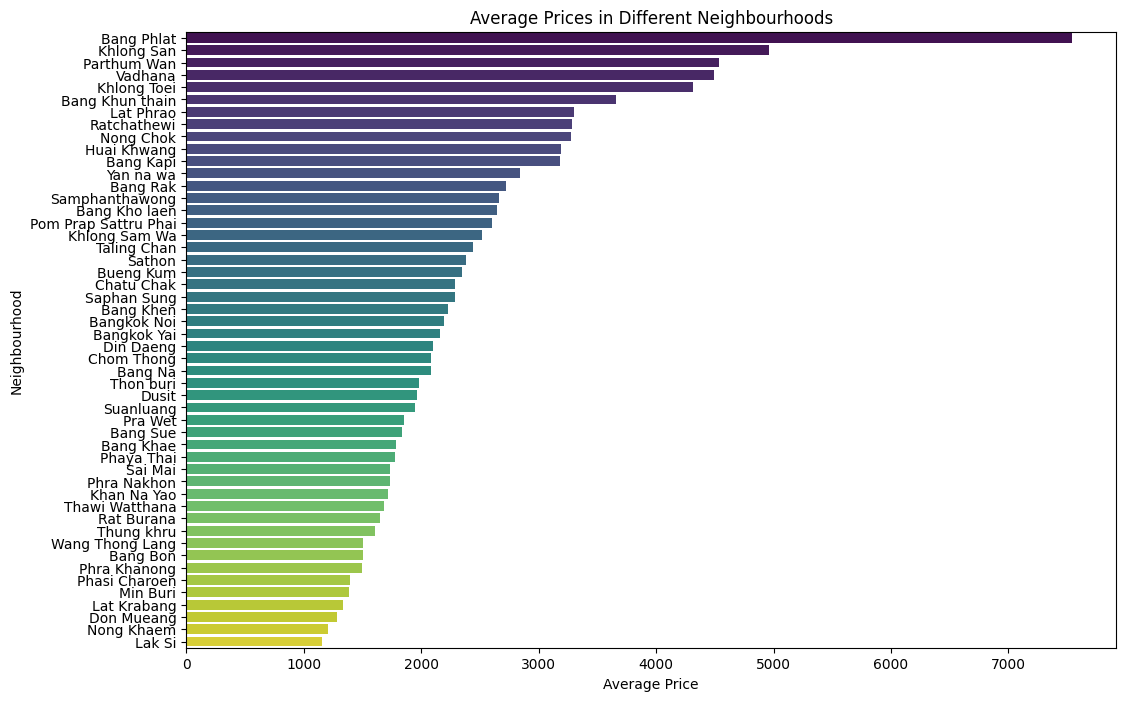

In [105]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a bar plot for average prices in each neighbourhood
sns.barplot(x='avg_price', y='neighbourhood', data=sorted_neighbourhood_info, palette='viridis')

# Set labels and title
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Average Prices in Different Neighbourhoods')

# Show the plot
plt.show()



Here are some insights that can be derived from the data regarding room types:

1. **Dominance of Entire Home/Apartment**:
<br>The "Entire home/apt" room type dominates with 55% of the total listings.
<br>Insight: The majority of Airbnb listings are entire homes or apartments that can be rented entirely by guests.

2. **Diversity of Room Types**:
<br>There is a significant variation in the types of rooms offered, including "Hotel room," "Private room," and "Shared room."
<br>Insight: The availability of various room types provides diverse options for guests based on their preferences and budget.

3. **Pricing Trends**:
<br>The highest average price is found in the "Entire home/apt" room type, with a value of approximately $3,284.
The lowest average price is in the "Shared room" type, with a value of around $899.
<br>Insight: Room types that offer an entire home or apartment tend to have higher prices compared to other room types.

4. **Private Room Popularity**:
<br>Despite having a lower percentage than "Entire home/apt," the "Private room" type is still quite popular, constituting 37% of the total listings.
<br>Insight: Airbnb users often opt for renting private rooms as a more economical option compared to entire homes or apartments.

5. **Limited Availability of Shared Rooms**:
<br>The "Shared room" type has the lowest percentage, accounting for only about 3.5% of the total listings.
<br>Insight: This room type may be less popular due to providing shared spaces with other guests, making it less commonly chosen by users.
These insights provide an understanding of the diversity of offered room types, the dominance of certain room types, and pricing trends in the Airbnb market, which can be valuable for property owners and potential guests.

In [108]:
# Counting the number of room_type
room_type_counts = df['room_type'].value_counts()

# Calculating the total number of listings
total_listings = len(df)

# Calculating the percentage of each room_type
room_type_percentages = (room_type_counts / total_listings) * 100

# Calculating the average price for each room_type
average_prices = df.groupby('room_type')['price'].mean()

# Creating a new DataFrame to display the information
room_type_info = pd.DataFrame({
    'Number of Room Types': room_type_counts,
    'Percentage': room_type_percentages,
    'Average Price': average_prices
})
room_type_info

,Number of Room Types,Percentage,Average Price
room_type,,,
Entire home/apt,8237,55.001335,3284.858929
Hotel room,646,4.313568,3037.139319
Private room,5575,37.226229,2988.596054
Shared room,518,3.458868,898.610039


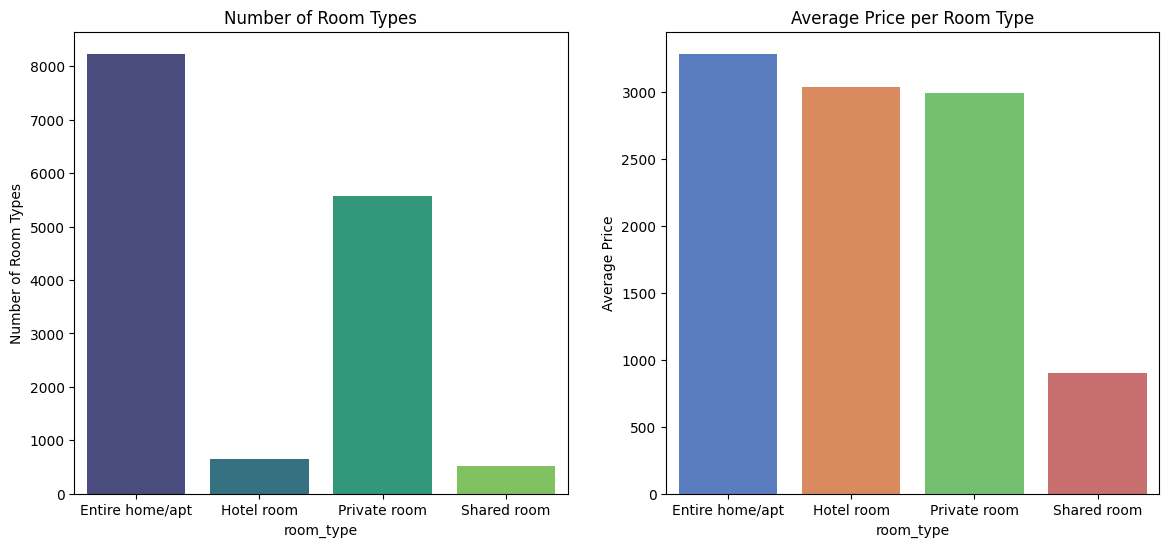

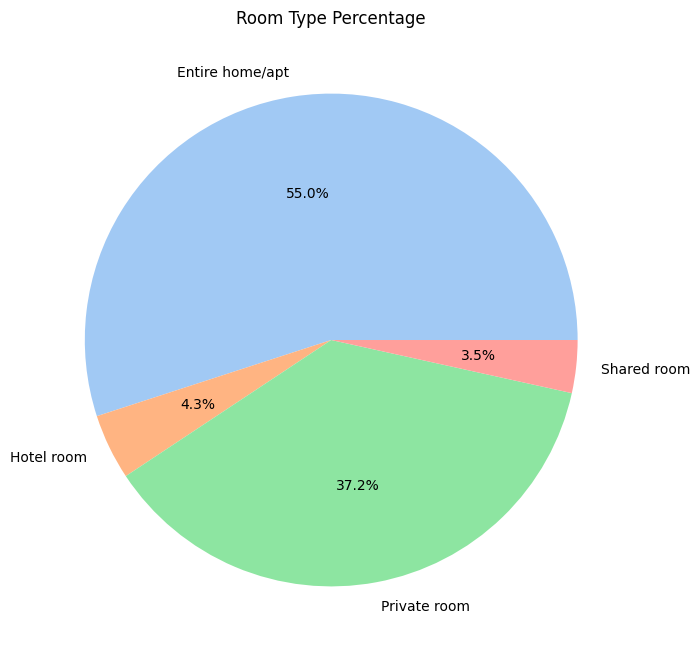

In [109]:
# Plotting the number and average price with bar charts
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=room_type_info.index, y='Number of Room Types', data=room_type_info, palette='viridis')
plt.title('Number of Room Types')

plt.subplot(1, 2, 2)
sns.barplot(x=room_type_info.index, y='Average Price', data=room_type_info, palette='muted')
plt.title('Average Price per Room Type')

plt.show()

# Plotting the percentage with a pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_info['Percentage'], labels=room_type_info.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Room Type Percentage')
plt.show()

Insight Analysis by Room Type:
1. **Entire Home/Apartment**:
<br>Top Neighborhoods: The top neighborhoods for entire home/apartment listings have the highest average prices.
<br>Price Variation: Prices for entire homes/apartments can significantly vary across neighborhoods.
<br>Premium Locations: Travelers seeking entire homes/apartments might expect to pay a premium for prime locations.

2. **Private Room**:
<br>Diverse Pricing: Private room prices also vary across neighborhoods, but the overall range may be lower compared to entire homes/apartments.
<br>Budget-Friendly Options: Private rooms provide budget-friendly options for guests, with some neighborhoods offering more affordable choices.

3. **Hotel Room**:
<br>Upscale Options: Hotel rooms, on average, tend to be priced higher, suggesting a focus on more upscale or premium offerings.
<br>Luxury Stay: Travelers looking for a hotel experience might find options with higher price points in certain neighborhoods.

4. **Shared Room**:
<br>Economical Choice: Shared rooms have the lowest average prices, making them a cost-effective choice for budget-conscious travelers.
<br>Limited Presence: The availability of shared rooms might be lower compared to other room types.
<br>General Observations:
<br>Diversity in Offerings: The data showcases a diverse range of offerings, catering to different preferences and budgets.
<br>Neighborhood Impact: Neighborhoods play a significant role in determining the average prices of different room types.
<br>Strategic Pricing: Hosts may strategically price their listings based on room type and neighborhood characteristics.
These insights provide a comprehensive view of how average prices vary across neighborhoods for different room types, offering valuable information for both hosts and guests when making accommodation decisions. Hosts can optimize pricing based on the local market, and guests can make informed choices aligned with their preferences and budgets.

In [118]:
# Filter DataFrame for room_type 'entire home/apt'
entire_home_data = df[df['room_type'] == 'Entire home/apt']

# Calculate the average price for each neighbourhood for the 'entire home/apt' room type
average_prices_neighbourhood = entire_home_data.groupby('neighbourhood')['price'].mean().reset_index()

# Add a column 'room_type' with the value 'entire home/apt'
average_prices_neighbourhood['room_type'] = 'entire home/apt'

# Sort based on avg_price in descending order
sorted_neighbourhood_info = average_prices_neighbourhood.sort_values(by='price', ascending=False).reset_index(drop=True)

# Create a new DataFrame 'avg_price'
result_df = sorted_neighbourhood_info[['neighbourhood', 'room_type', 'price']].rename(columns={'price': 'avg_price'})

# Display the resulting DataFrame
result_df


,neighbourhood,room_type,avg_price
0,Bang Khun thain,entire home/apt,8285.000000
1,Khlong San,entire home/apt,8142.551515
2,Lat Phrao,entire home/apt,5207.434783
3,Nong Chok,entire home/apt,5054.500000
4,Vadhana,entire home/apt,4827.550545
5,Parthum Wan,entire home/apt,4474.704348
6,Taling Chan,entire home/apt,4366.733333
7,Khlong Toei,entire home/apt,4027.349296
8,Huai Khwang,entire home/apt,3550.680498
9,Dusit,entire home/apt,3348.750000


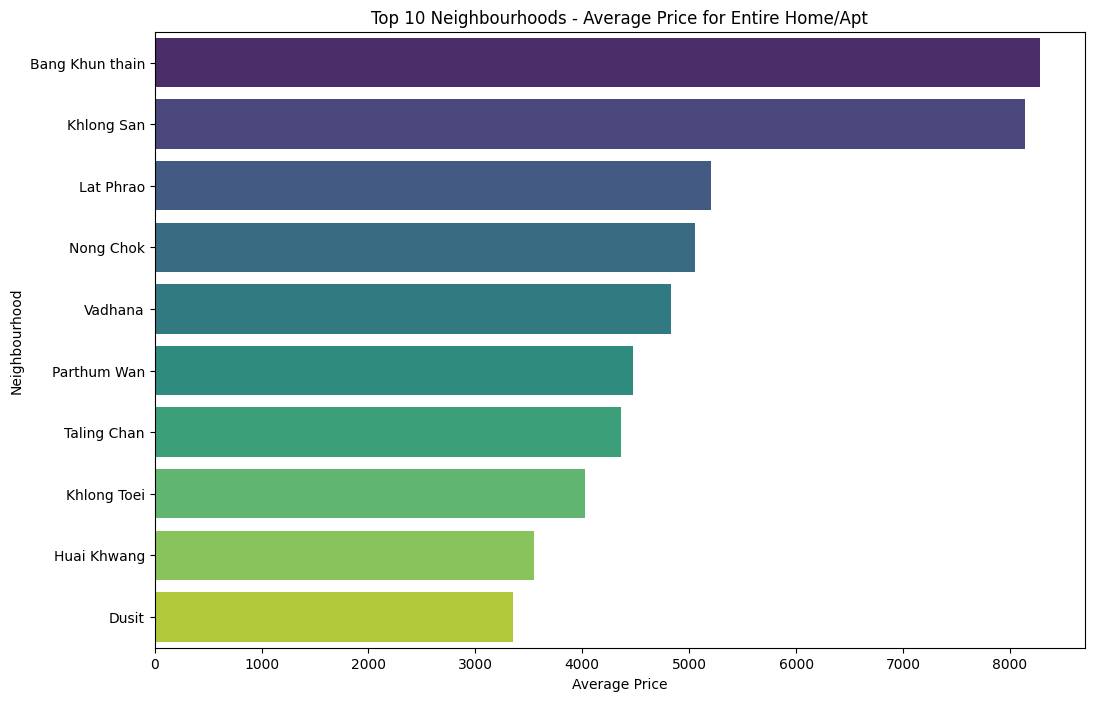

In [119]:
# Top 10
top_10_neighbourhoods = result_df.head(10)

# Visualization with a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_price', y='neighbourhood', data=top_10_neighbourhoods, palette='viridis')
plt.title('Top 10 Neighbourhoods - Average Price for Entire Home/Apt')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()


In [121]:
# Filter DataFrame for room_type 'private room'
private_room_data = df[df['room_type'] == 'Private room']

# Calculate the average price for each neighbourhood for the 'private room' room type
average_prices_neighbourhood = private_room_data.groupby('neighbourhood')['price'].mean().reset_index()

# Add a column 'room_type' with the value 'private room'
average_prices_neighbourhood['room_type'] = 'private room'

# Rename the column 'price' to 'avg_price'
average_prices_neighbourhood = average_prices_neighbourhood.rename(columns={'price': 'avg_price'})

# Sort based on avg_price in descending order
sorted_neighbourhood_info = average_prices_neighbourhood.sort_values(by='avg_price', ascending=False).reset_index(drop=True)

result_df = sorted_neighbourhood_info[['neighbourhood', 'room_type', 'avg_price']]
result_df

,neighbourhood,room_type,avg_price
0,Bang Phlat,private room,15388.111111
1,Khlong Toei,private room,5550.794055
2,Parthum Wan,private room,5274.036765
3,Ratchathewi,private room,5121.981132
4,Bang Kapi,private room,4655.757812
5,Vadhana,private room,4109.379310
6,Bang Kho laen,private room,3944.170732
7,Bueng Kum,private room,3086.523810
8,Bang Khen,private room,2905.875000
9,Bang Sue,private room,2843.112676


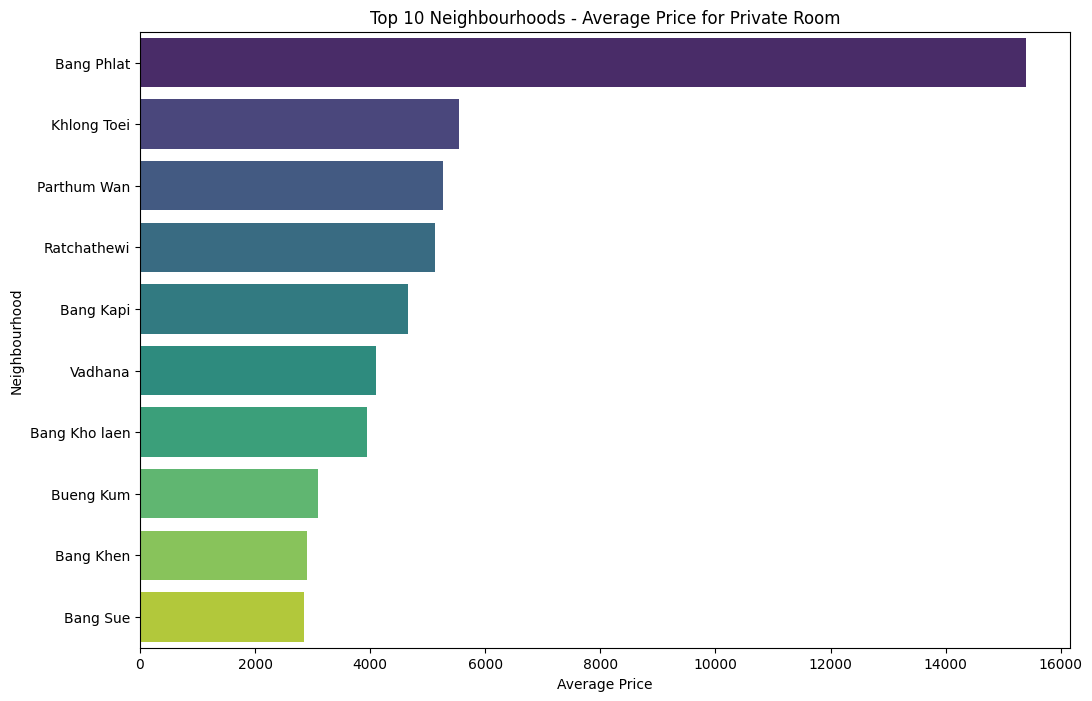

In [123]:
# Top 10
top_10_neighbourhoods = result_df.head(10)

# Visualization with a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_price', y='neighbourhood', data=top_10_neighbourhoods, palette='viridis')
plt.title('Top 10 Neighbourhoods - Average Price for Private Room')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

In [124]:
# Filter DataFrame for room_type 'hotel room'
hotel_room_data = df[df['room_type'] == 'Hotel room']

# Calculate the average price for each neighbourhood for the 'hotel room' room type
average_prices_neighbourhood = hotel_room_data.groupby('neighbourhood')['price'].mean().reset_index()

# Add a column 'room_type' with the value 'hotel room'
average_prices_neighbourhood['room_type'] = 'hotel room'

# Rename the column 'price' to 'avg_price'
average_prices_neighbourhood = average_prices_neighbourhood.rename(columns={'price': 'avg_price'})

# Sort based on avg_price in descending order
sorted_neighbourhood_info = average_prices_neighbourhood.sort_values(by='avg_price', ascending=False).reset_index(drop=True)

result_df = sorted_neighbourhood_info[['neighbourhood', 'room_type', 'avg_price']]
result_df


,neighbourhood,room_type,avg_price
0,Bang Kho laen,hotel room,7765.000000
1,Yan na wa,hotel room,7183.125000
2,Ratchathewi,hotel room,6317.500000
3,Chatu Chak,hotel room,4944.500000
4,Samphanthawong,hotel room,4288.444444
5,Vadhana,hotel room,3965.788462
6,Huai Khwang,hotel room,3591.680000
7,Parthum Wan,hotel room,3132.622222
8,Bang Na,hotel room,2738.111111
9,Sathon,hotel room,2682.066667


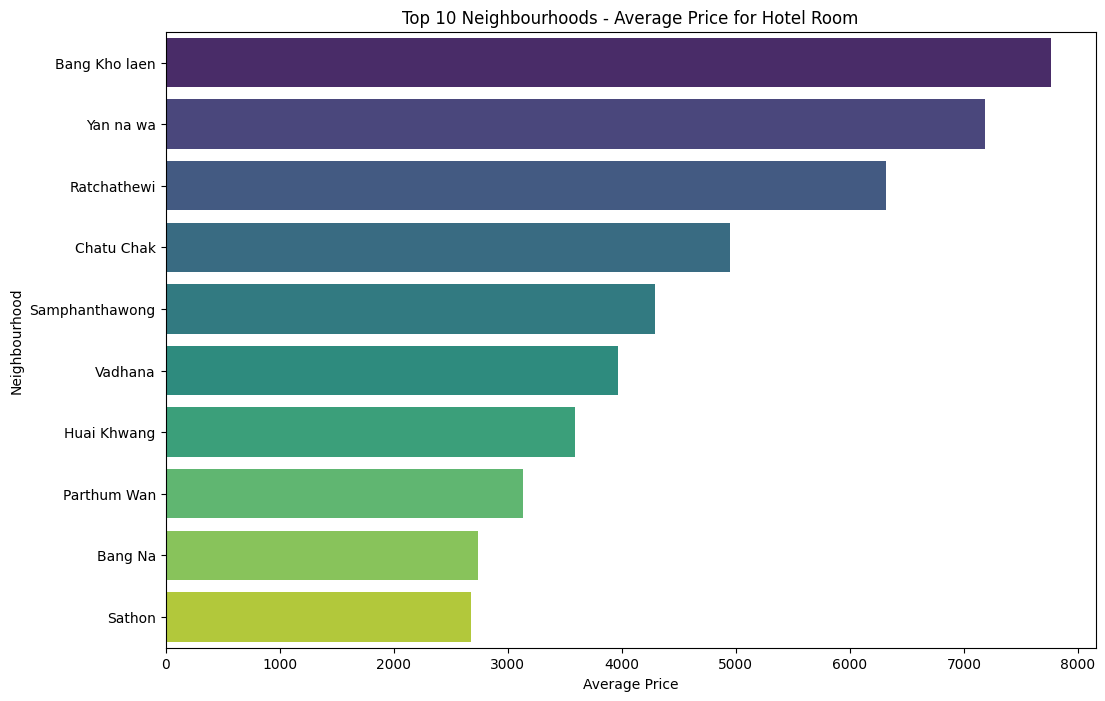

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil 10 teratas
top_10_neighbourhoods = result_df.head(10)

# Visualisasi dengan barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_price', y='neighbourhood', data=top_10_neighbourhoods, palette='viridis')
plt.title('Top 10 Neighbourhoods - Average Price for Hotel Room')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

In [129]:
# Filter DataFrame untuk room_type 'shared room'
shared_room_data = df[df['room_type'] == 'Shared room']

# Menghitung rata-rata harga tiap neighbourhood untuk room_type 'shared room'
average_prices_neighbourhood = shared_room_data.groupby('neighbourhood')['price'].mean().reset_index()

# Menambahkan kolom 'room_type' dengan nilai 'shared room'
average_prices_neighbourhood['room_type'] = 'shared room'

# Mengganti nama kolom 'price' menjadi 'avg_price'
average_prices_neighbourhood = average_prices_neighbourhood.rename(columns={'price': 'avg_price'})

# Mengurutkan berdasarkan avg_price secara menurun
sorted_neighbourhood_info = average_prices_neighbourhood.sort_values(by='avg_price', ascending=False).reset_index(drop=True)

result_df = sorted_neighbourhood_info[['neighbourhood', 'room_type', 'avg_price']]
result_df

,neighbourhood,room_type,avg_price
0,Bang Khun thain,shared room,7276.000000
1,Lat Phrao,shared room,5000.000000
2,Parthum Wan,shared room,2976.666667
3,Phra Khanong,shared room,2176.600000
4,Samphanthawong,shared room,1765.538462
5,Chom Thong,shared room,1500.000000
6,Suanluang,shared room,1153.200000
7,Yan na wa,shared room,1050.000000
8,Ratchathewi,shared room,1044.327869
9,Wang Thong Lang,shared room,975.000000


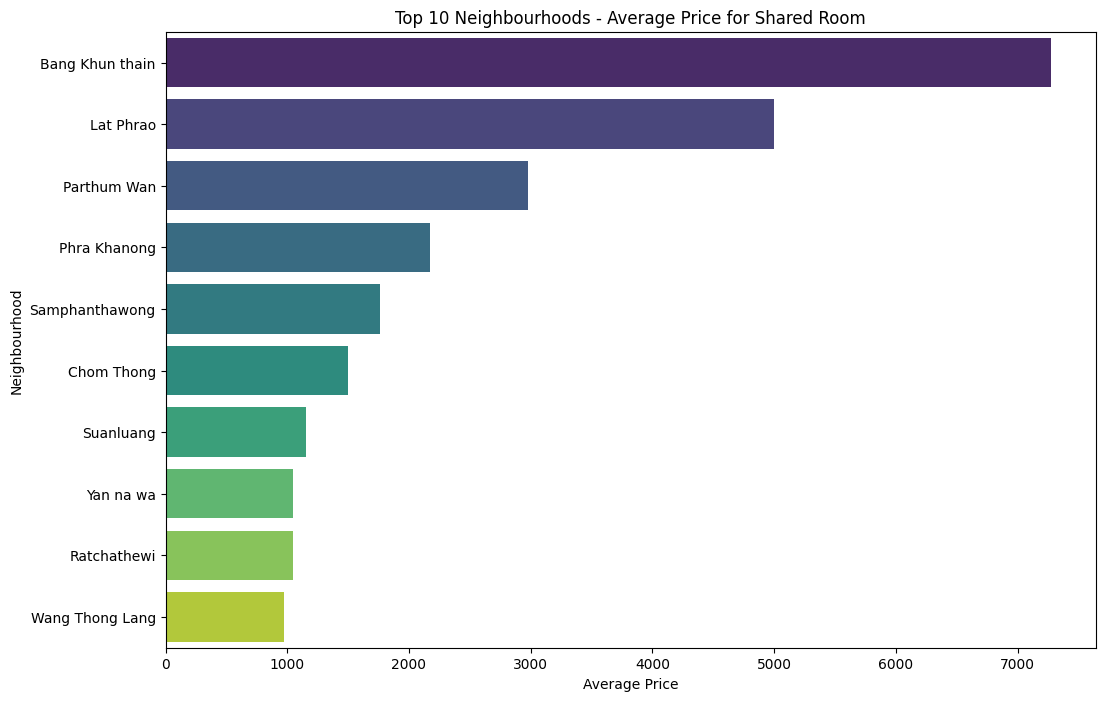

In [127]:
# Top 10
top_10_neighbourhoods = result_df.head(10)

# Visualization with a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_price', y='neighbourhood', data=top_10_neighbourhoods, palette='viridis')
plt.title('Top 10 Neighbourhoods - Average Price for Shared Room')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

In [131]:
# Sort the DataFrame by 'price' in descending order
sorted_prices = df.sort_values(by='price', ascending=False).reset_index(drop=True)

# Top 10 data with the highest prices along with information on neighbourhood and room_type
top_10_expensive = sorted_prices.head(10)[['neighbourhood', 'room_type', 'price']]
top_10_expensive

,neighbourhood,room_type,price
0,Vadhana,Entire home/apt,1100000
1,Vadhana,Entire home/apt,1014758
2,Khlong Toei,Entire home/apt,1000000
3,Khlong Toei,Entire home/apt,1000000
4,Huai Khwang,Entire home/apt,1000000
5,Khlong San,Entire home/apt,710760
6,Bang Phlat,Private room,600700
7,Bang Kapi,Private room,429443
8,Bang Phlat,Private room,400717
9,Khlong Toei,Private room,372227


# Conclusion

1. **Room Type Analysis**:
<br>The majority of listings fall into the "Entire home/apt" category, indicating a preference for private accommodations.
<br>Private rooms are also popular, offering a more economical choice for budget-conscious travelers.
<br>Hotel rooms cater to those seeking a more upscale or luxury experience, with higher average prices.
<br>Shared rooms are the most budget-friendly option but have a limited presence in the overall listings.

2. **Neighborhood Pricing Trends**:
<br>Different neighborhoods exhibit diverse pricing trends, with significant variations in average prices for different room types.
<br>Prime locations often command higher prices, especially for entire homes/apartments.

3. **Night Range Impact on Pricing**:
<br>Listings grouped by 'night_range' and 'minimum_nights' showcase variations in average prices.
<br>Pricing strategy is influenced by the duration of stay, with longer minimum nights generally associated with lower average prices.

4. **Diversity in Offerings**:
<br>The data reflects a diverse range of accommodation options, providing choices for travelers with different preferences and budgets.
<br>Hosts strategically price their listings based on room type, neighborhood characteristics, and minimum night requirements.

5. **Guest Decision-Making Factors**:
<br>Guests can choose accommodations based on their priorities, whether seeking a private, budget-friendly room or a more luxurious hotel experience.
<br>The analysis enables hosts to optimize pricing strategies according to market demand and property characteristics.

In conclusion, the insights gained from this analysis provide valuable information for both hosts and guests. Hosts can refine their pricing strategies based on room type, neighborhood dynamics, and minimum night requirements. Guests can make informed decisions aligned with their preferences and budget considerations, enhancing the overall Airbnb experience for both parties.

# Recommendation


For Indonesian travelers planning to use Airbnb, here are some recommendations to help them make more informed decisions:

1. **Choose the Right Type of Accommodation**:
<br>For families or large groups, "Entire home/apt" might be a comfortable choice.
<br>If seeking a more local experience, consider booking a "Private room" in a host's home.

2. **Pay Attention to Location and Accessibility**:
<br>Select a location close to tourist attractions or public transportation for convenient travel.
<br>Check previous reviews to ensure the safety and convenience of the location.

3. **Consider Pricing**:
<br>Compare prices among different types of accommodations and locations.

4. **Read Reviews from Previous Guests**:
<br>Reviews from previous guests provide insight into their experiences.
<br>Focus on reviews that are relevant to your preferences and needs.
